In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')

In [2]:
car=pd.read_csv('DS2_C5_S5_OldCars_Data_Challenge.csv')
car2=car.copy()

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
car.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
car.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
car.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
units = car.astype(str).replace('[^a-zA-Z]', '', regex= True)

In [8]:
units=units.mode()
units

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,,MahindraXUVWWD,Mumbai,,,Diesel,Manual,First,kmpl,CC,bhp,,nan,


In [9]:
car=car.rename(columns={'Mileage':'Mileage(kmpl)','Engine':'Engine(CC)','Power':'Power(bhp)'})

In [10]:
car.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
car['Mileage(kmpl)'].replace('[a-zA-z]', '', regex= True, inplace = True)

In [12]:
car['Engine(CC)'].replace('[a-zA-z]', '', regex= True, inplace = True)

In [13]:
car['Mileage(kmpl)'].replace(' /','',inplace=True,regex=True)

In [14]:
car = car.replace('null bhp',np.nan)
car['Power(bhp)']=car['Power(bhp)'].replace('\sbhp', '',regex = True).astype(float)
car['Power(bhp)'].fillna(car['Power(bhp)'].mean(), inplace=True)
car['Power(bhp)']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power(bhp), Length: 7253, dtype: float64

In [15]:
car['Mileage(kmpl)']=car['Mileage(kmpl)'].astype('float')
car['Engine(CC)']=car['Engine(CC)'].astype('float')
car['Power(bhp)']=car['Power(bhp)'].astype('float')

In [16]:
car=car.drop(['S.No.','New_Price'],axis=1)

In [17]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<AxesSubplot:>

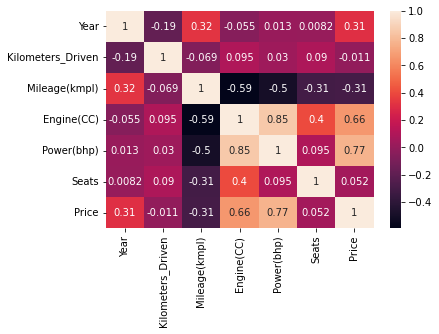

In [18]:
sns.heatmap(car.corr(), annot= True)

In [19]:
car['Engine(CC)'].astype(float)

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine(CC), Length: 7253, dtype: float64

In [20]:
car['Engine(CC)']=car['Engine(CC)'].fillna(car['Engine(CC)'].mean())

In [21]:
car['Mileage(kmpl)']=car['Mileage(kmpl)'].fillna(car['Mileage(kmpl)'].mean())

In [22]:
car['Seats']=car['Seats'].fillna(car['Seats'].median())

In [23]:
car['Price']=car['Price'].fillna(car['Price'].median())

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage(kmpl)      7253 non-null   float64
 8   Engine(CC)         7253 non-null   float64
 9   Power(bhp)         7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              7253 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [25]:
car.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage(kmpl)        0
Engine(CC)           0
Power(bhp)           0
Seats                0
Price                0
dtype: int64

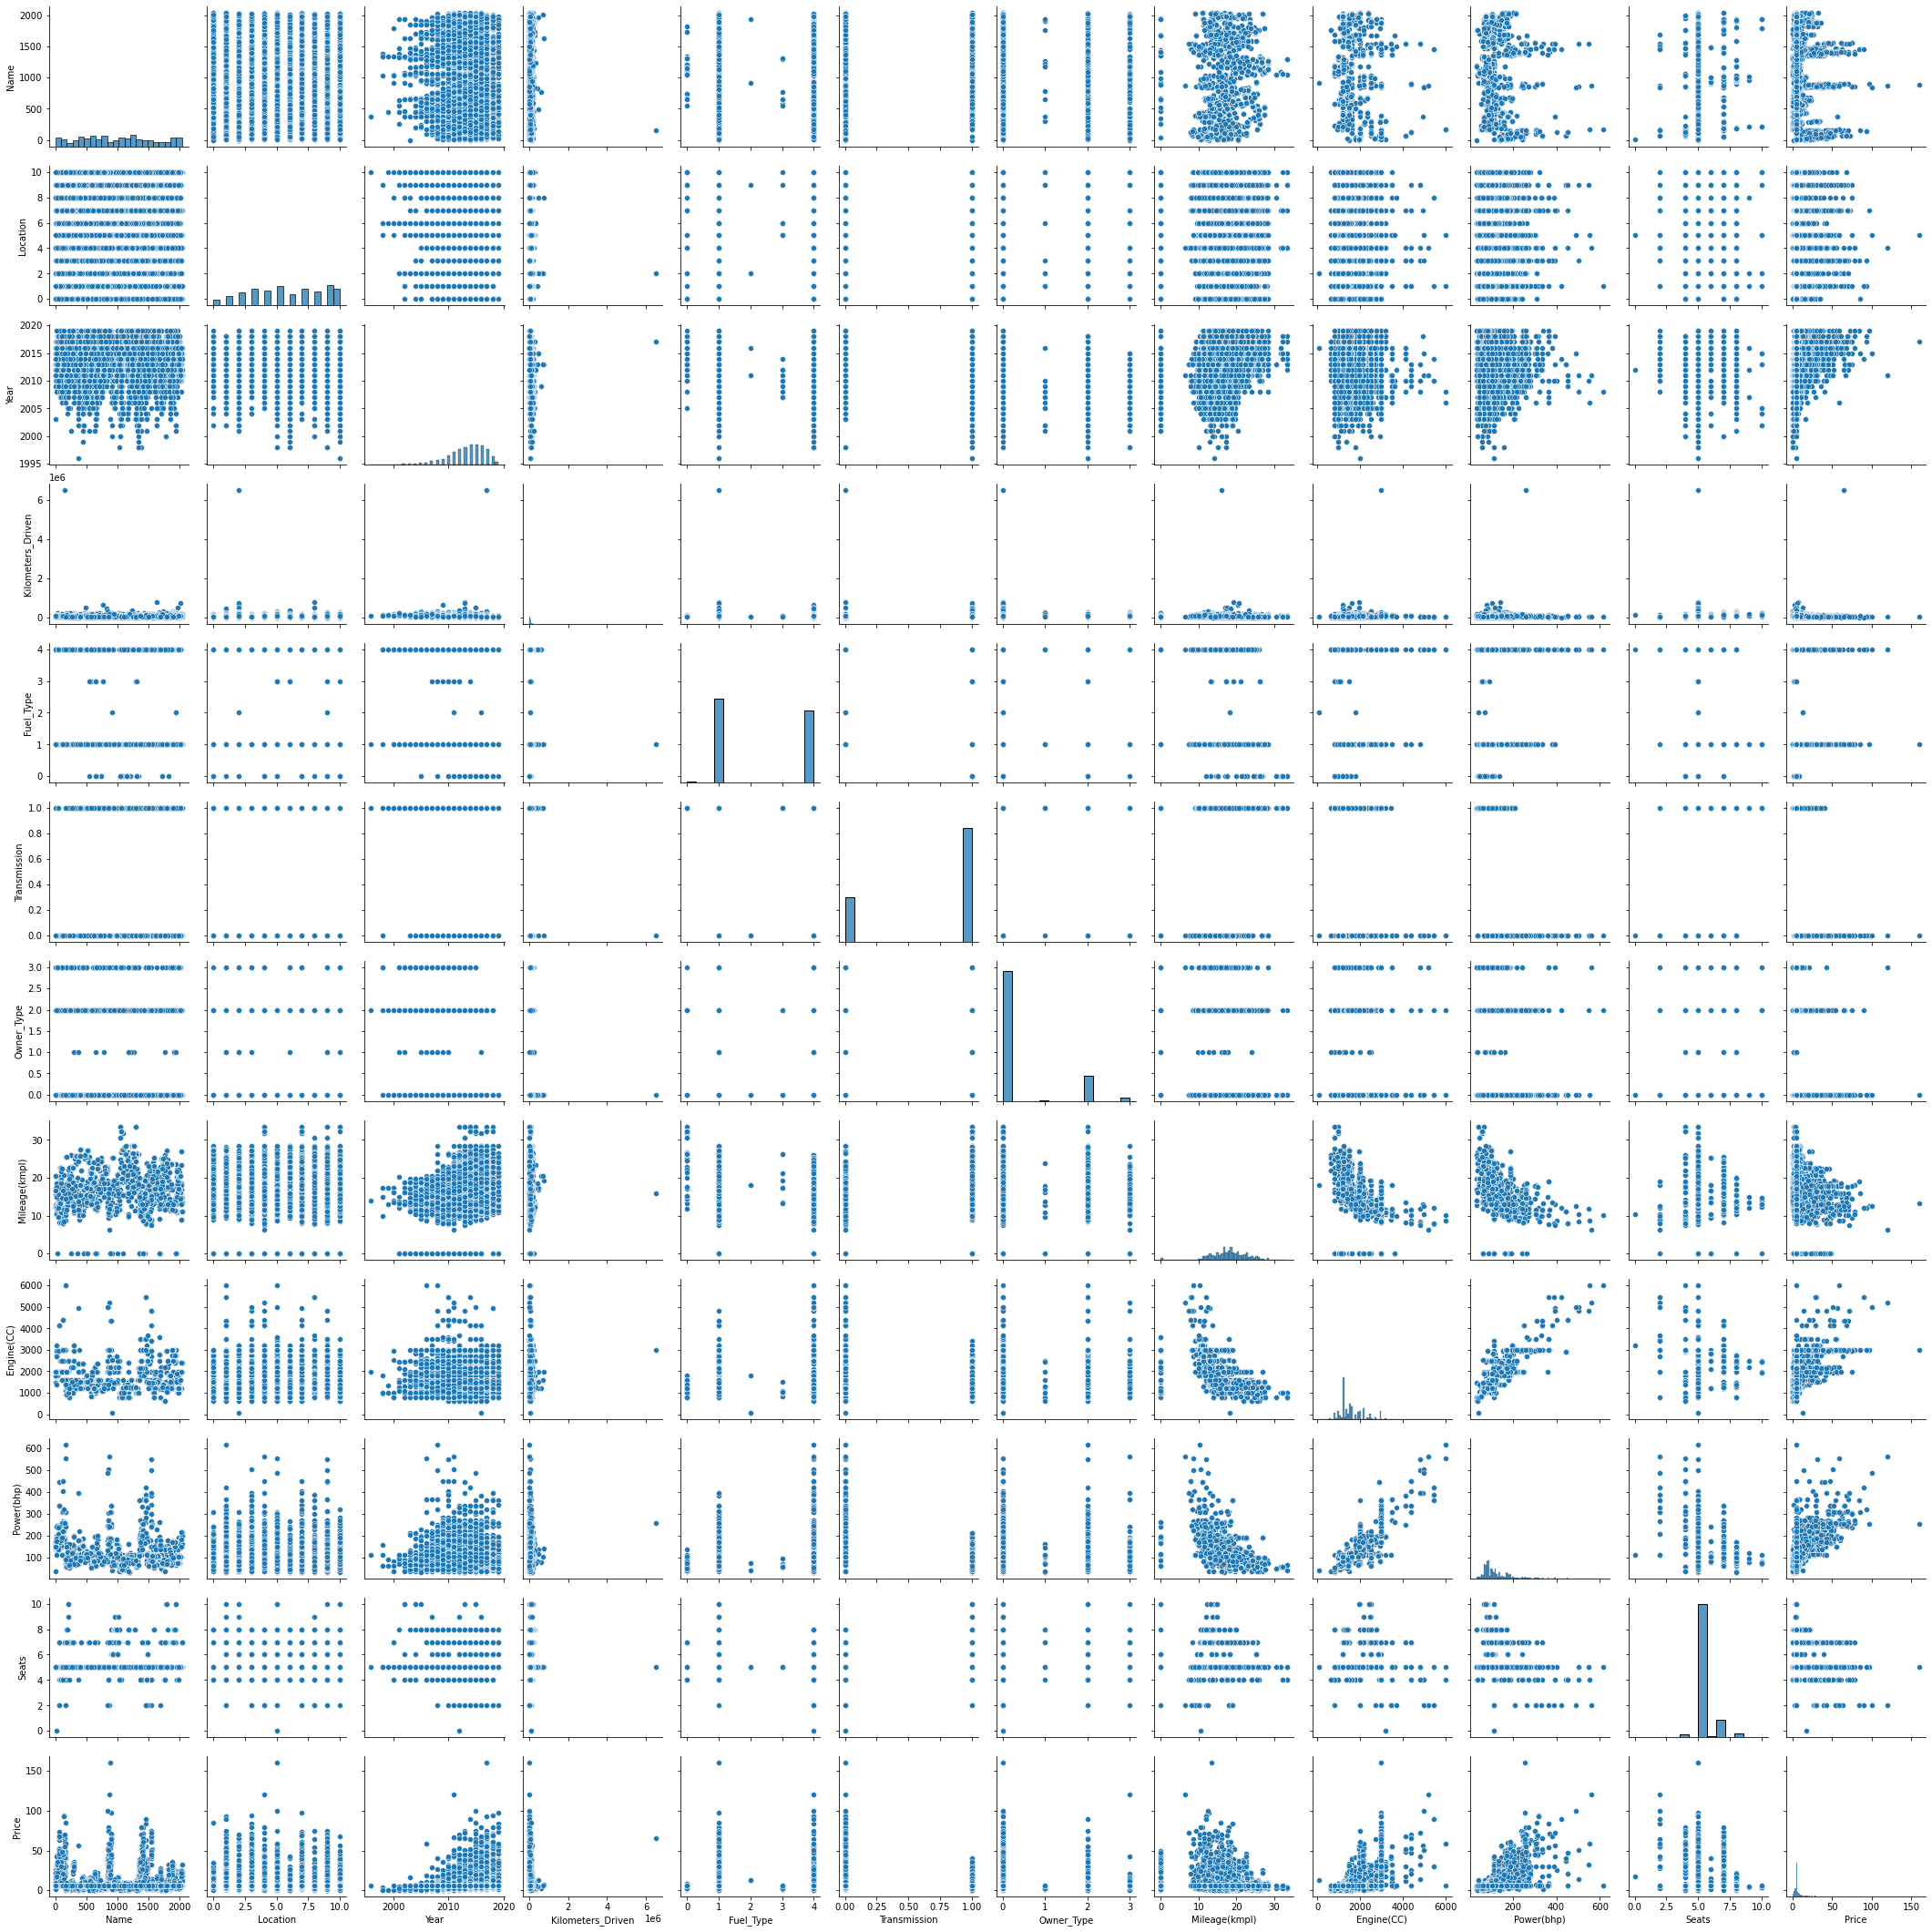

In [63]:
sns.pairplot(car)

In [26]:
cat=list(car.select_dtypes(include='object').columns)

In [27]:
for i in cat:
    car[i]=preprocessing.LabelEncoder().fit_transform(car[i])

In [28]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,1310,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,560,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,529,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,1160,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [29]:
X=car.drop('Price',axis=1)
y=car['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 88 )

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25, random_state = 88 )

In [44]:
cross_validate(model, X_train, y_train,scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'max_error'], cv= 5)

{'fit_time': array([0.01899076, 0.02198887, 0.0150249 , 0.01399255, 0.01399374]),
 'score_time': array([0.00499749, 0.00301147, 0.0039916 , 0.00297928, 0.00201559]),
 'test_neg_mean_squared_error': array([-58.8179571 , -32.52493173, -37.07442911, -34.70799553,
        -45.48999173]),
 'test_neg_mean_absolute_error': array([-3.17501328, -2.7137632 , -2.98258328, -2.67879937, -3.22215654]),
 'test_max_error': array([-114.8342    ,  -56.976     ,  -69.36      ,  -77.18133333,
         -58.32714286])}

In [45]:
model=DecisionTreeRegressor(max_depth=3)

In [46]:
model.fit(X_train1,y_train1)

DecisionTreeRegressor(max_depth=3)

In [47]:
model.score(X_test1,y_test1)

0.5998436734089514

[Text(0.5, 0.875, 'X[9] <= 164.85\nsquared_error = 109.741\nsamples = 5439\nvalue = 8.925'),
 Text(0.25, 0.625, 'X[8] <= 1958.0\nsquared_error = 16.003\nsamples = 4466\nvalue = 5.797'),
 Text(0.125, 0.375, 'X[2] <= 2013.5\nsquared_error = 7.411\nsamples = 3826\nvalue = 5.074'),
 Text(0.0625, 0.125, 'squared_error = 4.35\nsamples = 1732\nvalue = 3.732'),
 Text(0.1875, 0.125, 'squared_error = 7.22\nsamples = 2094\nvalue = 6.185'),
 Text(0.375, 0.375, 'X[3] <= 40224.0\nsquared_error = 45.612\nsamples = 640\nvalue = 10.113'),
 Text(0.3125, 0.125, 'squared_error = 95.493\nsamples = 125\nvalue = 16.566'),
 Text(0.4375, 0.125, 'squared_error = 20.946\nsamples = 515\nvalue = 8.547'),
 Text(0.75, 0.625, 'X[9] <= 241.39\nsquared_error = 288.805\nsamples = 973\nvalue = 23.287'),
 Text(0.625, 0.375, 'X[2] <= 2013.5\nsquared_error = 134.226\nsamples = 788\nvalue = 19.428'),
 Text(0.5625, 0.125, 'squared_error = 48.197\nsamples = 332\nvalue = 13.14'),
 Text(0.6875, 0.125, 'squared_error = 147.117\ns

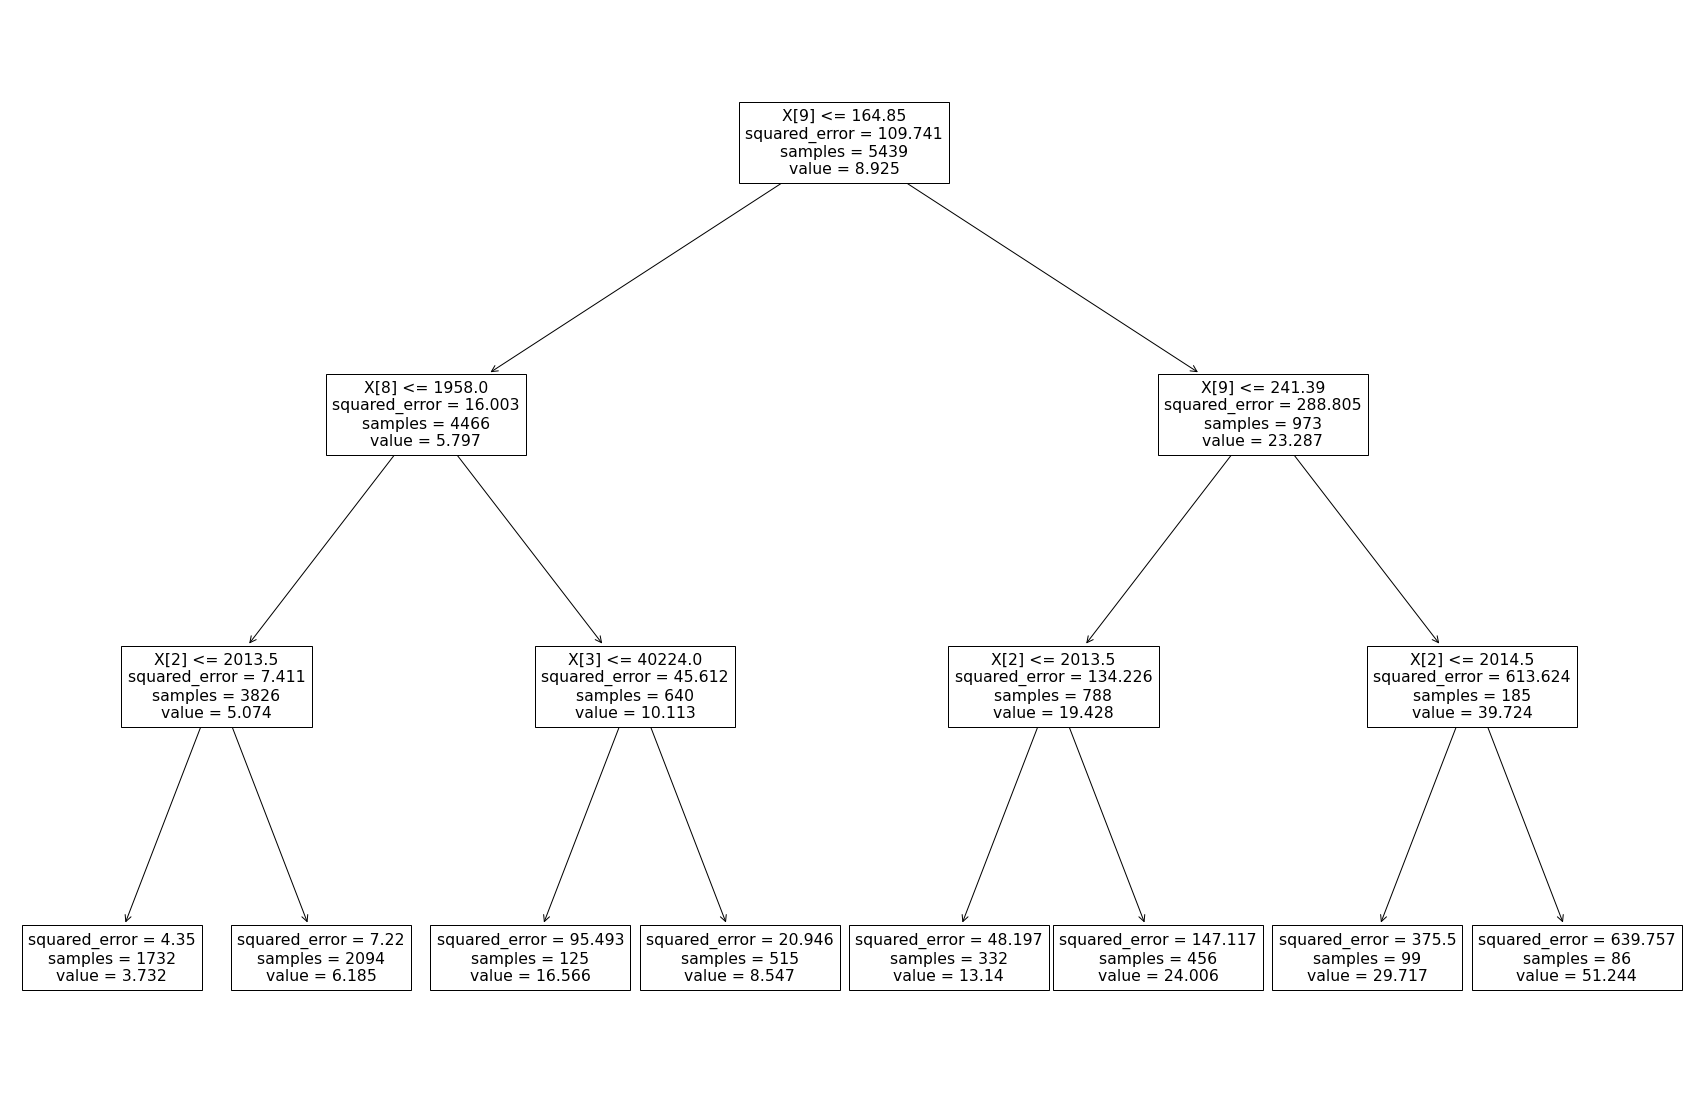

In [58]:
fig=plt.figure(figsize=(30,20))
tree.plot_tree(model)

In [48]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [49]:
kf=KFold(n_splits=5)

In [50]:
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 88), X, y, cv= kf,
    scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 8.20
For max depth: 2
rmse= 7.43
For max depth: 3
rmse= 6.81
For max depth: 4
rmse= 6.70
For max depth: 5
rmse= 6.65
For max depth: 6
rmse= 6.60
For max depth: 7
rmse= 6.69
For max depth: 8
rmse= 7.12
For max depth: 9
rmse= 7.13
For max depth: 10
rmse= 7.28
For max depth: 11
rmse= 7.17
For max depth: 12
rmse= 7.16
For max depth: 13
rmse= 7.46
For max depth: 14
rmse= 7.38
For max depth: 15
rmse= 7.43


In [51]:
modeltree=DecisionTreeRegressor(max_depth=6)

In [52]:
modeltree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [53]:
modeltree.score(X_test,y_test)

0.6218465262314601

[Text(0.5301339285714286, 0.9285714285714286, 'Power(bhp) <= 164.85\nsquared_error = 109.741\nsamples = 5439\nvalue = 8.925'),
 Text(0.2734375, 0.7857142857142857, 'Engine(CC) <= 1958.0\nsquared_error = 16.003\nsamples = 4466\nvalue = 5.797'),
 Text(0.14285714285714285, 0.6428571428571429, 'Year <= 2013.5\nsquared_error = 7.411\nsamples = 3826\nvalue = 5.074'),
 Text(0.07142857142857142, 0.5, 'Year <= 2010.5\nsquared_error = 4.35\nsamples = 1732\nvalue = 3.732'),
 Text(0.03571428571428571, 0.35714285714285715, 'Engine(CC) <= 1607.787\nsquared_error = 5.541\nsamples = 689\nvalue = 2.909'),
 Text(0.017857142857142856, 0.21428571428571427, 'Year <= 2007.5\nsquared_error = 2.5\nsamples = 587\nvalue = 2.654'),
 Text(0.008928571428571428, 0.07142857142857142, 'squared_error = 2.556\nsamples = 190\nvalue = 1.986'),
 Text(0.026785714285714284, 0.07142857142857142, 'squared_error = 2.158\nsamples = 397\nvalue = 2.974'),
 Text(0.05357142857142857, 0.21428571428571427, 'Mileage(kmpl) <= 5.0\nsqua

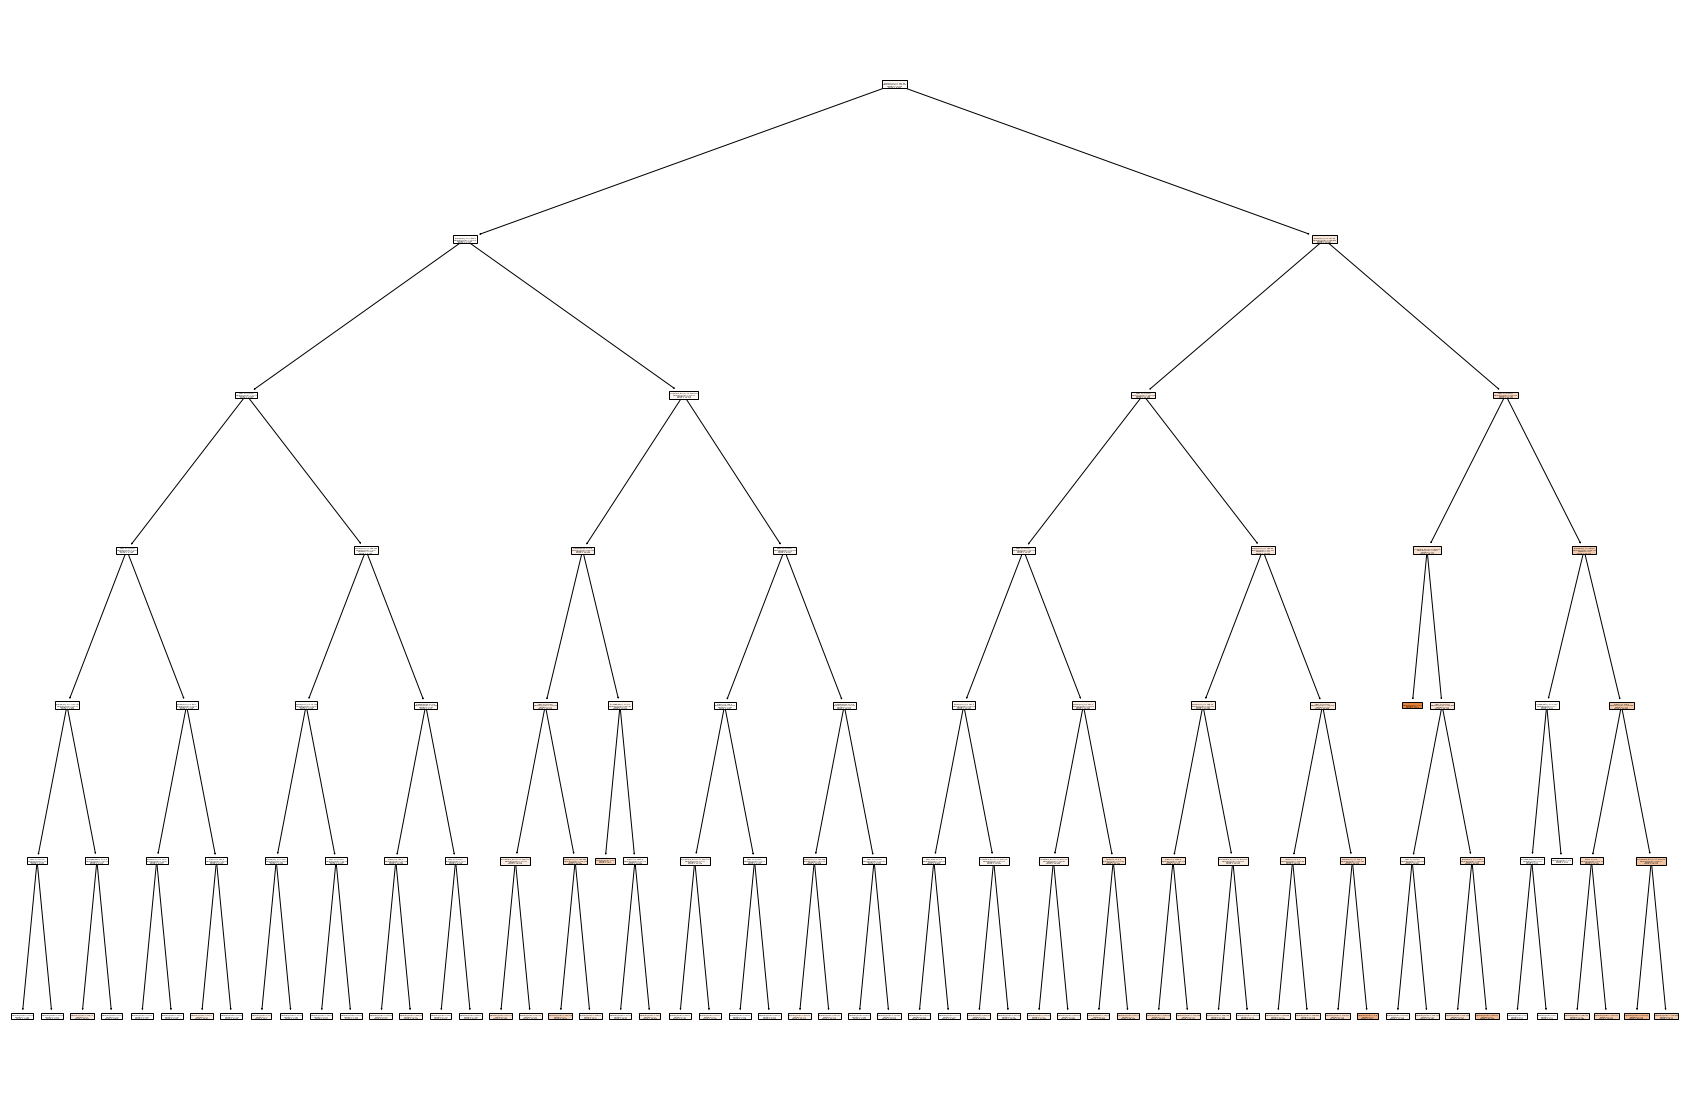

In [62]:
fig=plt.figure(figsize=(30,20))
tree.plot_tree(modeltree,feature_names=X.columns,filled=True)